In [4]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("analyse.csv")

In [6]:
df

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

## Visualisation des valeurs nulle 


<AxesSubplot: >

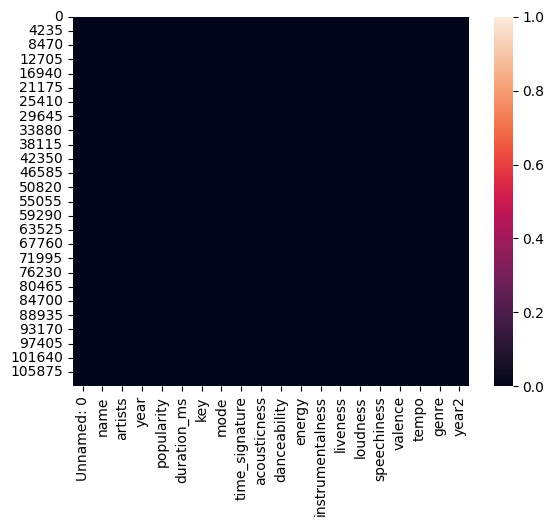

In [7]:
sns.heatmap(df.isna())

## Visualisation des corrélations 

/tmp/ipykernel_53658/2400482602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = "viridis",annot = True,ax = ax)


<AxesSubplot: >

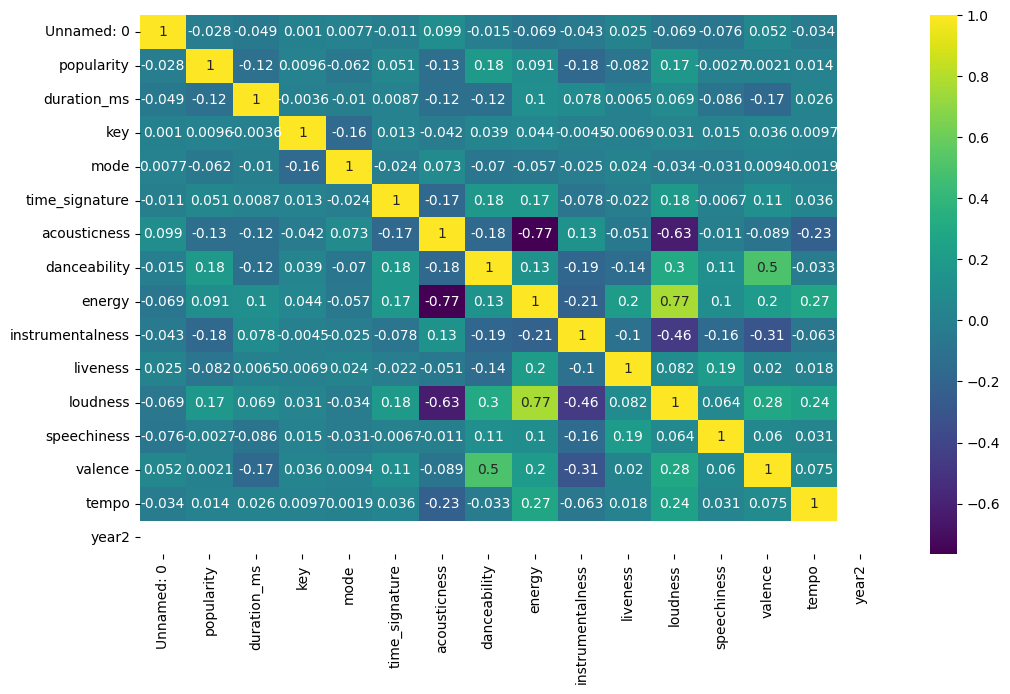

In [8]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df.corr(),cmap = "viridis",annot = True,ax = ax)

/tmp/ipykernel_53658/1293749950.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = genre_df.corr()['popularity']
/tmp/ipykernel_53658/1293749950.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = genre_df.corr()['popularity']
/tmp/ipykernel_53658/1293749950.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = genre_df.corr()['popularity']
/tmp/ipykernel_53658/1293749950.py:13: FutureWarning: The default value of numeric_only in Dat

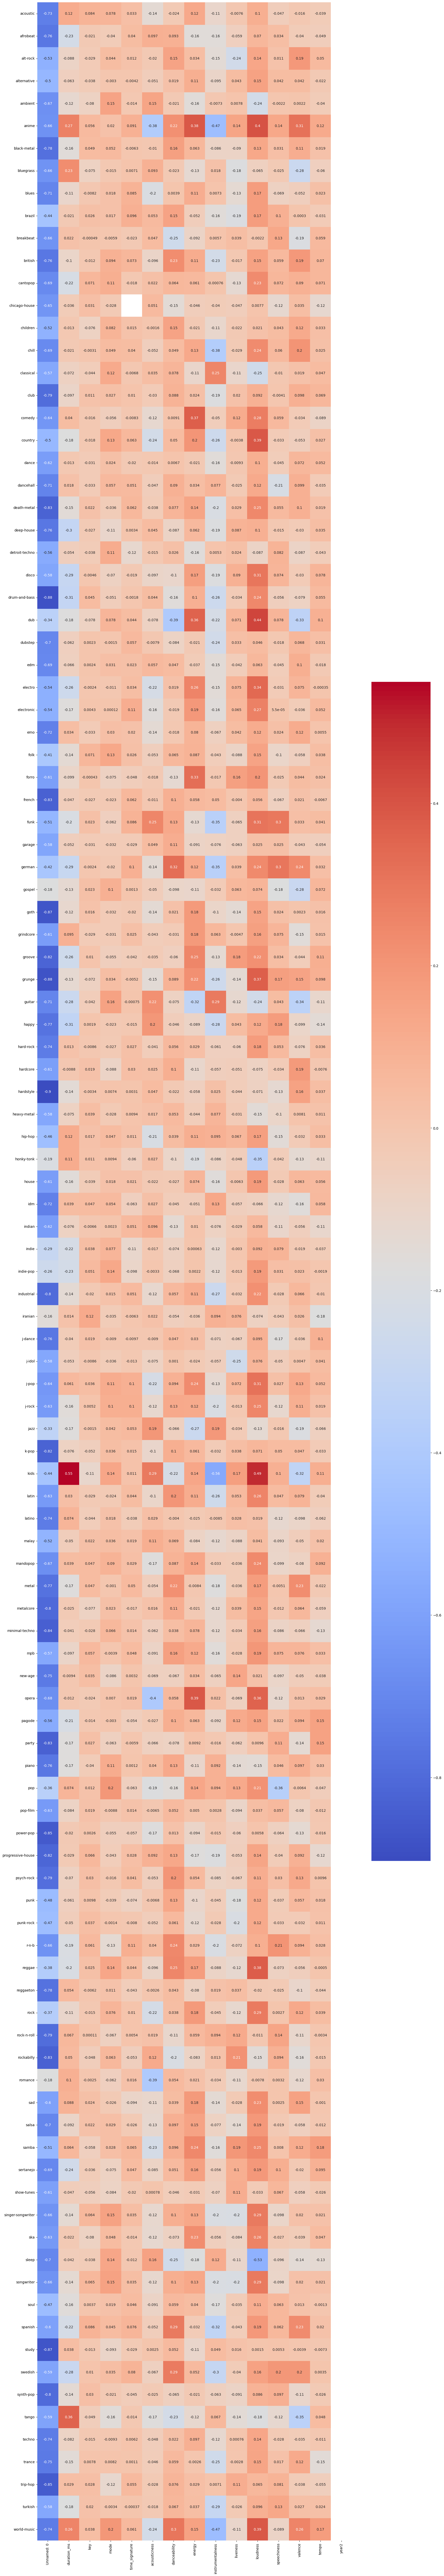

In [9]:
import pandas as pd
import seaborn as sns

# créer un dictionnaire pour stocker les tableaux de corrélation pour chaque genre
corr_dict = {}

# parcourir chaque genre unique dans la colonne 'genre'
for genre in df['genre'].unique():
    # sélectionner les lignes correspondantes dans le dataframe
    genre_df = df[df['genre'] == genre]
    
    # calculer les corrélations entre la popularité et les autres colonnes
    corr_matrix = genre_df.corr()['popularity']
    corr_matrix = corr_matrix.drop('popularity')
    
    # stocker la matrice de corrélation dans le dictionnaire
    corr_dict[genre] = corr_matrix
    
# combiner les tableaux de corrélation en un seul dataframe
corr_df = pd.concat(corr_dict, axis=1)
corr_df = corr_df.T

# afficher le tableau de corrélation
fig, ax = plt.subplots(figsize=(20, 130))

sns.heatmap(corr_df, cmap='coolwarm', annot=True,ax = ax)
plt.savefig('heatmap.png')

# Generate the HTML code to display the image
html_code = f'<img src="heatmap.png">'

# Write the HTML code to a file
with open('heatmap.html', 'w') as f:
    f.write(html_code)


## Reduction de la taille du graph en prenant une liste 


In [10]:
df_grouped = df.groupby(df.genre).mean()
df_group_sorted = df_grouped.sort_values(by='popularity', ascending=False)
df_group_sorted.head(10).index

/tmp/ipykernel_53658/2206035554.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(df.genre).mean()


Index(['pop', 'dance', 'latin', 'latino', 'house', 'edm', 'hip-hop', 'k-pop',
       'electro', 'reggaeton'],
      dtype='object', name='genre')

In [11]:
liste_populaire = ['pop', 'dance', 'latin', 'latino', 'house', 'edm', 'hip-hop', 'k-pop',
       'electro', 'reggaeton']

/tmp/ipykernel_53658/1690853374.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = genre_df.corr()['popularity']
/tmp/ipykernel_53658/1690853374.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = genre_df.corr()['popularity']
/tmp/ipykernel_53658/1690853374.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = genre_df.corr()['popularity']
/tmp/ipykernel_53658/1690853374.py:13: FutureWarning: The default value of numeric_only in Dat

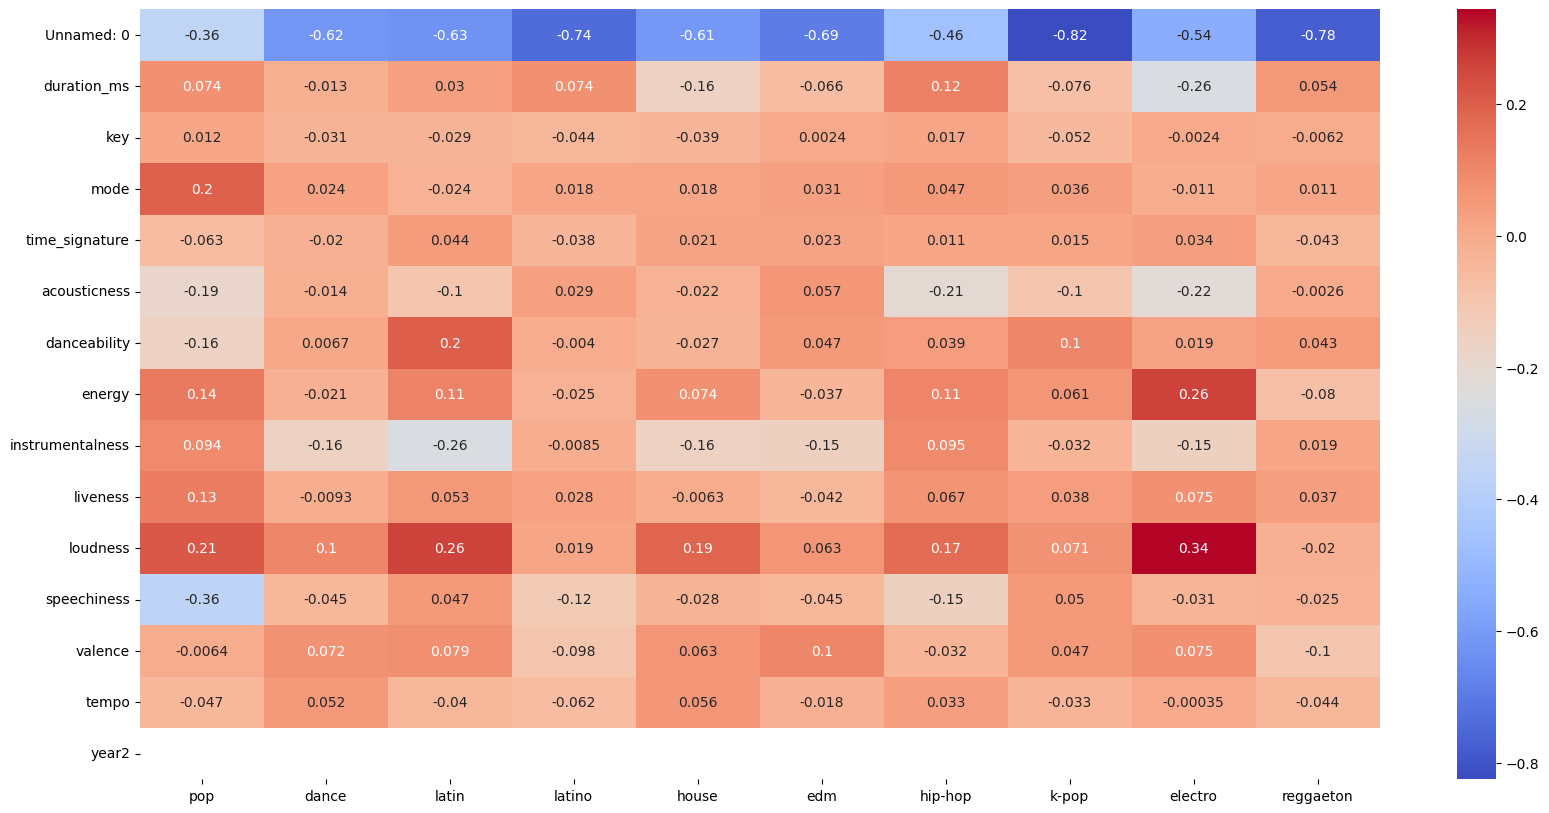

In [12]:
import pandas as pd
import seaborn as sns

# créer un dictionnaire pour stocker les tableaux de corrélation pour chaque genre
corr_dict = {}

# parcourir chaque genre unique dans la colonne 'genre'
for genre in liste_populaire:
    # sélectionner les lignes correspondantes dans le dataframe
    genre_df = df[df['genre'] == genre]
    
    # calculer les corrélations entre la popularité et les autres colonnes
    corr_matrix = genre_df.corr()['popularity']
    corr_matrix = corr_matrix.drop('popularity')
    
    # stocker la matrice de corrélation dans le dictionnaire
    corr_dict[genre] = corr_matrix
    
# combiner les tableaux de corrélation en un seul dataframe
corr_df = pd.concat(corr_dict, axis=1)


# afficher le tableau de corrélation
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(corr_df, cmap='coolwarm', annot=True,ax = ax)
plt.savefig('heatmap.png')

# Generate the HTML code to display the image
html_code = f'<img src="heatmap.png">'

# Write the HTML code to a file
with open('heatmap.html', 'w') as f:
    f.write(html_code)


## Histplot 

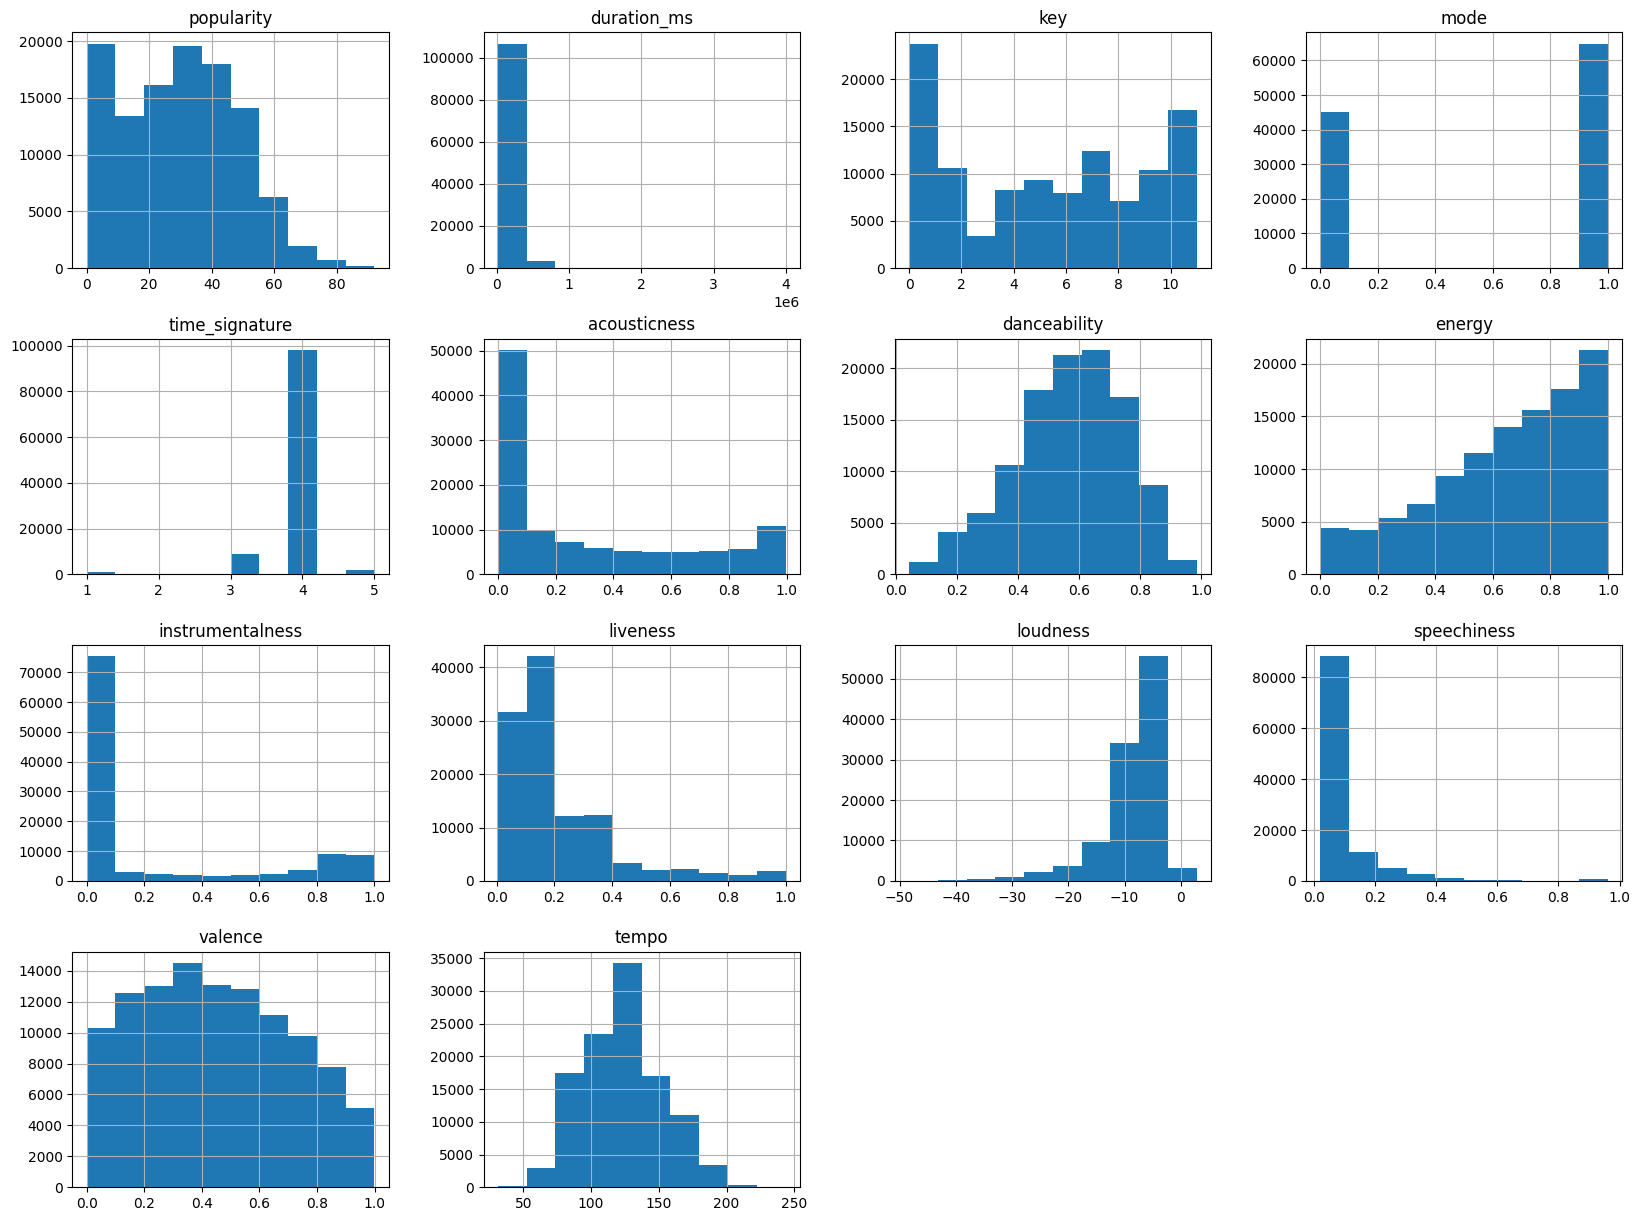

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame


# Select only the numeric columns
numeric_cols = ['year', 'popularity', 'duration_ms', 'key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

# Plot a histogram for each numeric column
df[numeric_cols].hist(figsize=(20, 15))
plt.show()


In [14]:
""" import seaborn as sns

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')

# Create a scatter plot matrix
sns.pairplot(numeric_columns) """


" import seaborn as sns\n\n# Select only the numeric columns\nnumeric_columns = df.select_dtypes(include='number')\n\n# Create a scatter plot matrix\nsns.pairplot(numeric_columns) "

## QUELQUE INVESTIGATION 

<AxesSubplot: xlabel='loudness', ylabel='energy'>

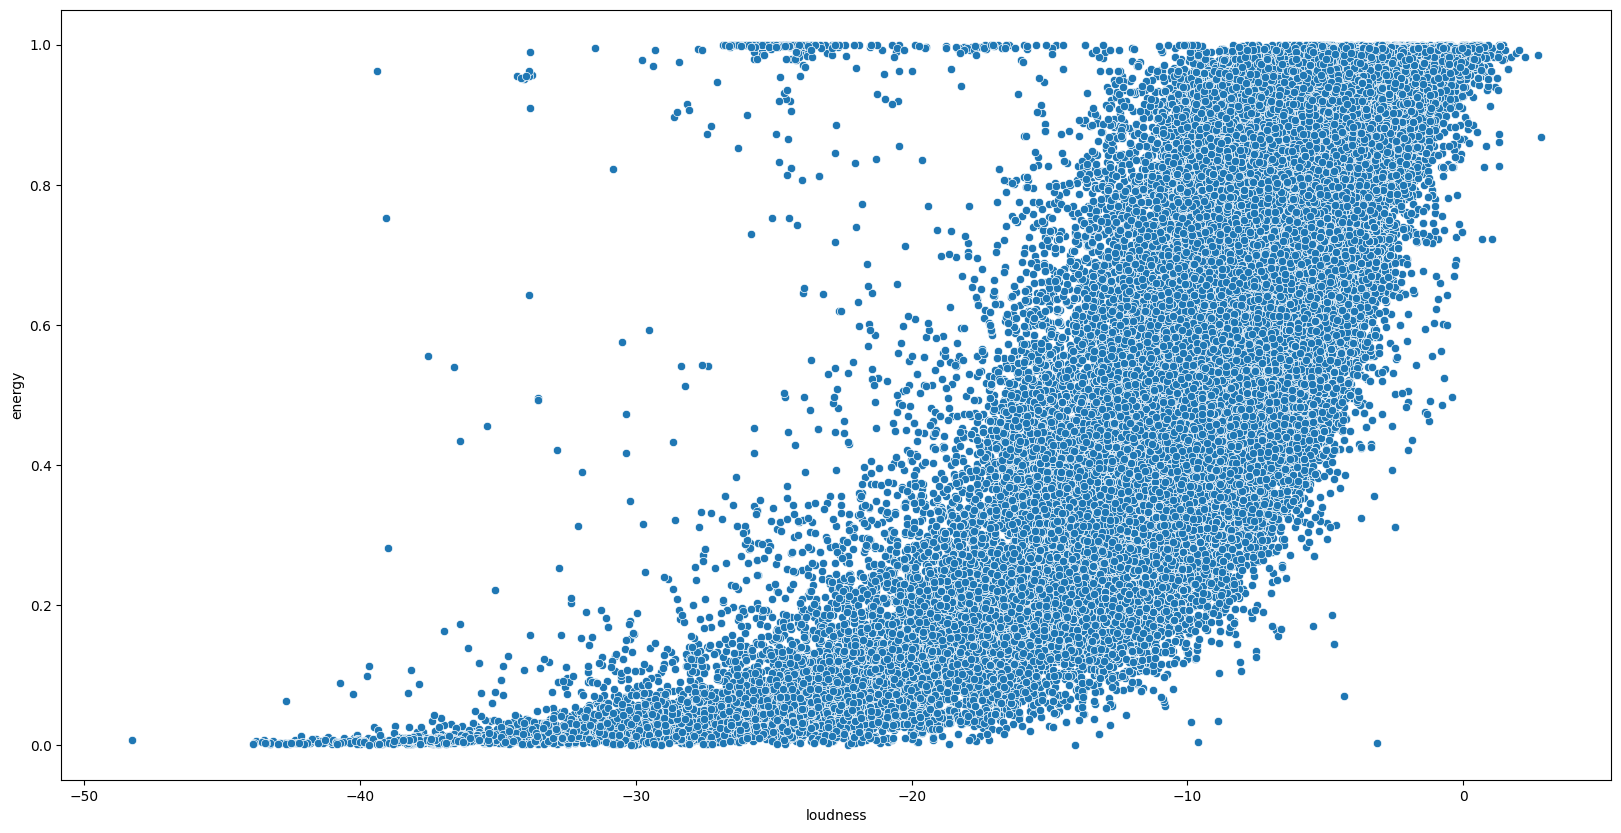

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x = df.loudness, y = df.energy,ax = ax)

<AxesSubplot: xlabel='speechiness', ylabel='instrumentalness'>

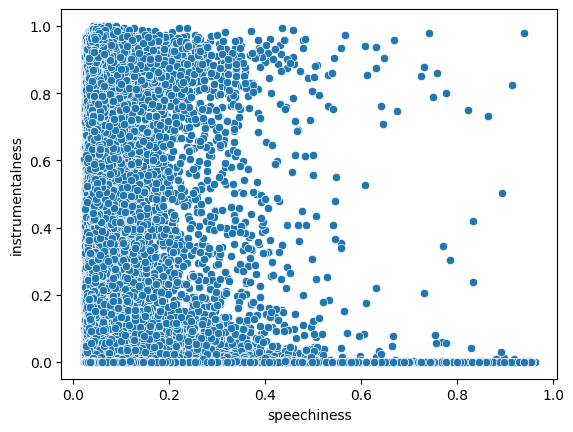

In [16]:
sns.scatterplot(x= df.speechiness , y = df.instrumentalness)

## Variance des corr par genre

In [17]:
import pandas as pd

# assuming you have a dataframe `df` with a "genre" column and a "popularity" column

# group by genre and compute the correlation with popularity
grouped = df.groupby("genre").corrwith(df["popularity"])

# calculate the standard deviation of the correlations for each genre
stds = grouped.std()

print(stds)


Unnamed: 0          1.660903e-01
popularity          8.586944e-17
duration_ms         1.386706e-01
key                 4.119243e-02
mode                7.199146e-02
time_signature      4.679013e-02
acousticness        1.177025e-01
danceability        1.229531e-01
energy              1.356840e-01
instrumentalness    1.410730e-01
liveness            9.548731e-02
loudness            1.655455e-01
speechiness         9.774168e-02
valence             1.277780e-01
tempo               6.686001e-02
year2                        NaN
dtype: float64


/tmp/ipykernel_53658/333532179.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corrwith is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("genre").corrwith(df["popularity"])


<AxesSubplot: xlabel='loudness', ylabel='Count'>

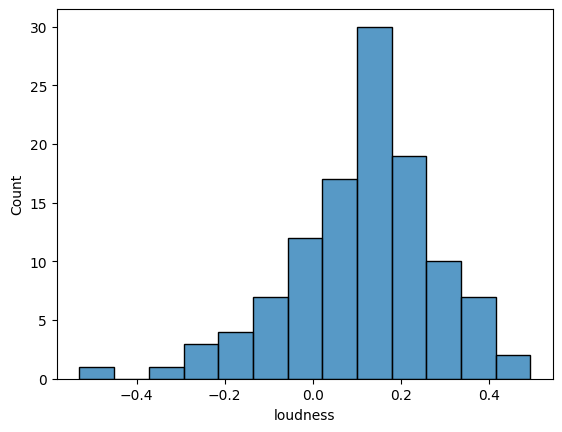

In [18]:
sns.histplot(grouped.loudness)

/tmp/ipykernel_53658/1381394150.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corrwith is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("genre").corrwith(df["popularity"])


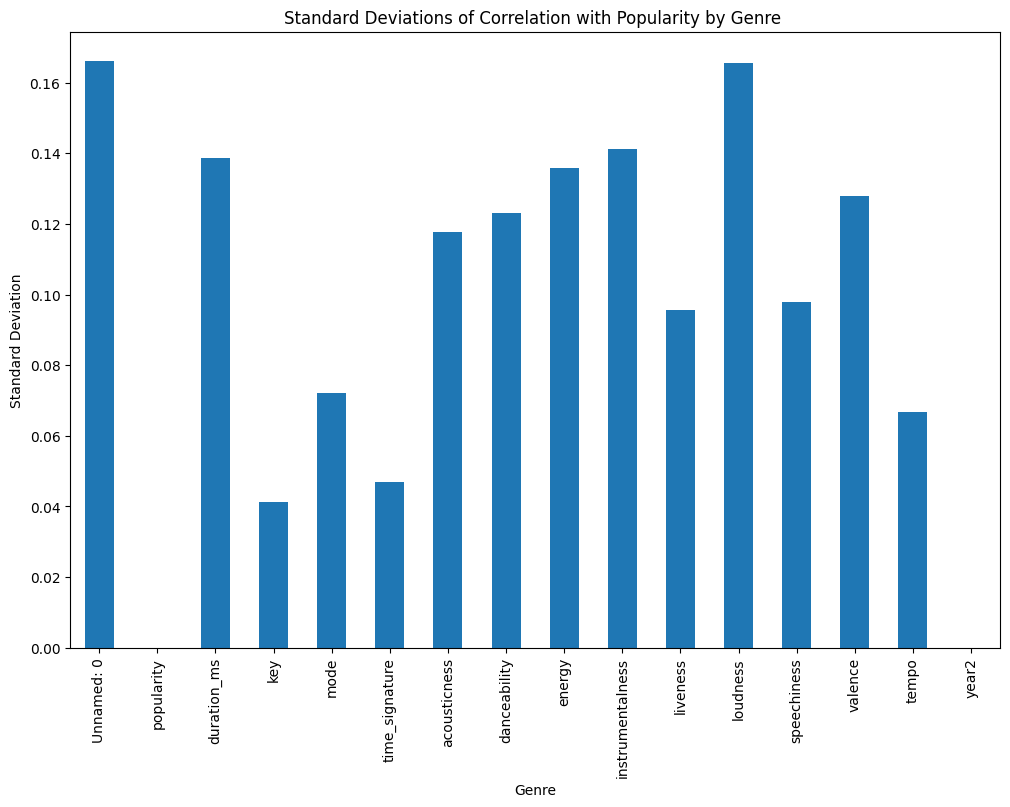

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming you have a dataframe `df` with a "genre" column and a "popularity" column

# group by genre and compute the correlation with popularity
grouped = df.groupby("genre").corrwith(df["popularity"])

# calculate the standard deviation of the correlations for each genre
stds = grouped.std()

# plot a bar chart of the standard deviations
stds.plot(kind="bar", figsize=(12,8))
plt.title("Standard Deviations of Correlation with Popularity by Genre ")
plt.xlabel("Genre")
plt.ylabel("Standard Deviation")
plt.show()


In [20]:
import pandas as pd

# Assuming you have a dataframe `df` with columns "genre", "popularity", and "loudness"
# Group by "genre" and compute the correlation between "popularity" and "loudness" for each group
corr_df = df.groupby("genre")[["popularity", "loudness"]].corrwith(df["popularity"])

# Print the resulting dataframe
print(corr_df)


             popularity  loudness
genre                            
acoustic            1.0  0.102642
afrobeat            1.0  0.069892
alt-rock            1.0  0.137992
alternative         1.0  0.153574
ambient             1.0 -0.239113
...                 ...       ...
techno              1.0  0.137423
trance              1.0  0.145530
trip-hop            1.0  0.065316
turkish             1.0  0.095632
world-music         1.0  0.387137

[113 rows x 2 columns]


In [21]:
df_corr = corr_df

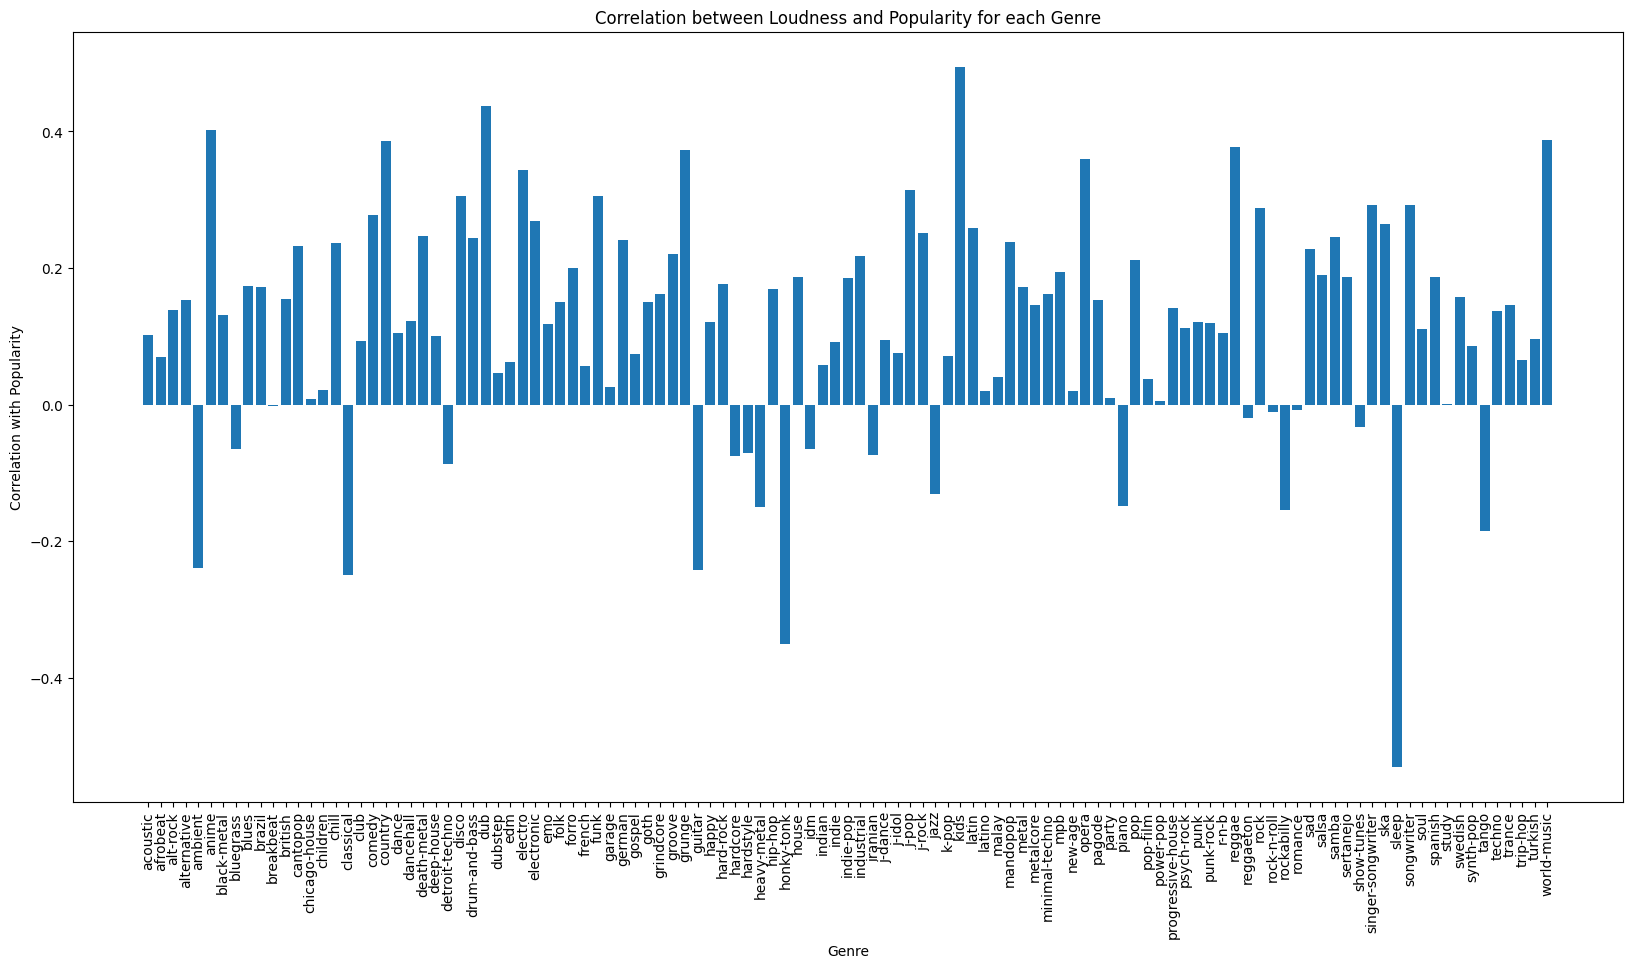

In [22]:
import matplotlib.pyplot as plt

# assuming you have a dataframe `df_corr` with a "genre" column and a "popularity" column
# and a correlation between popularity and loudness for each genre
plt.figure(figsize=(20,10))
plt.bar(df_corr.index, df_corr['loudness'], align='center')
plt.xticks(df_corr.index, rotation=90)
plt.xlabel('Genre')
plt.ylabel('Correlation with Popularity')
plt.title('Correlation between Loudness and Popularity for each Genre')
plt.show()


In [23]:
df.columns

Index(['Unnamed: 0', 'name', 'artists', 'year', 'popularity', 'duration_ms',
       'key', 'mode', 'time_signature', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'valence', 'tempo', 'genre', 'year2'],
      dtype='object')

In [24]:
features_names = ['popularity', 'duration_ms', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

In [25]:
df_num = df[[ 'popularity', 'duration_ms',
       'key', 'mode', 'time_signature', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'valence', 'tempo', 'genre']]

In [26]:
features_importance = [0.12618437, 0.07060739, 0.03389639, 0.04736206, 0.06183309,
       0.0874851 , 0.0724811 , 0.06175569, 0.08360442, 0.04144034,
       0.06938287, 0.06198847, 0.05716593, 0.05221804]

In [27]:
df_grouped_var_num = df_num.groupby(df_num.genre).std()

In [28]:
df_grouped_var_num

popularity    duration_ms       key      mode  time_signature  \
genre                                                                        
acoustic       9.903112   53095.035488  3.520269  0.437198        0.523405   
afrobeat      11.319634  107359.683466  3.590375  0.500186        0.358280   
alt-rock      10.430165   72093.753080  3.578259  0.489521        0.307400   
alternative    8.708698   60497.650416  3.601746  0.499994        0.270910   
ambient        8.817264  149337.248073  3.496161  0.494126        0.757504   
...                 ...            ...       ...       ...             ...   
techno         8.839114  101428.794574  3.622728  0.497641        0.236573   
trance         7.905795   99662.797634  3.555059  0.500150        0.259589   
trip-hop      11.945080   99203.004748  3.542348  0.500240        0.332228   
turkish       12.099161   49741.050829  3.480901  0.449224        0.309761   
world-music   12.094428  110434.435315  3.701429  0.451158        0.818727   

             acousticness  danceability    energy  instrumentalness  liveness  \
genre                                                                           
acoustic         0.307814      0.129224  0.218376          0.366199  0.089549   
afrobeat         0.243265      0.130609  0.162321          0.333414  0.149560   
alt-rock         0.197122      0.132234  0.172617          0.197402  0.164948   
alternative      0.256722      0.142963  0.190905          0.204660  0.138899   
ambient          0.299579      0.177578  0.210506          0.288027  0.112732   
...                   ...           ...       ...               ...       ...   
techno           0.111863      0.123524  0.158022          0.322516  0.136969   
trance           0.059379      0.119863  0.100998          0.385413  0.198648   
trip-hop         0.284786      0.136533  0.192540          0.372050  0.139445   
turkish          0.268741      0.132378  0.165191          0.207719  0.113230   
world-music      0.373505      0.165632  0.328970          0.426718  0.242773   

              loudness  speechiness   valence      tempo  
genre                                                     
acoustic      4.083850     0.031711  0.190269  30.542156  
afrobeat      2.507336     0.099166  0.207670  26.509515  
alt-rock      2.413865     0.057297  0.223823  29.920798  
alternative   2.557712     0.096626  0.222420  29.716227  
ambient       7.373919     0.037156  0.150368  32.969234  
...                ...          ...       ...        ...  
techno        3.128018     0.072814  0.224847  17.043508  
trance        1.984994     0.050400  0.191250  13.078687  
trip-hop      3.677616     0.062235  0.247903  26.547540  
turkish       2.771455     0.084623  0.204896  27.615217  
world-music  10.502325     0.066032  0.168151  34.058985  

[113 rows x 14 columns]

In [29]:
# Standart scaler 

In [30]:
# boucle qui pour chaque element de features_names multiplie la colonne par features importance 
i = 0
for element in features_names:
    df_grouped_var_num[element] = df_grouped_var_num[element]*features_importance[i]
    i +=1


In [31]:
df_grouped_var_num

popularity   duration_ms       key      mode  time_signature  \
genre                                                                       
acoustic       1.249618   3748.901878  0.119324  0.020707        0.032364   
afrobeat       1.428361   7580.387041  0.121701  0.023690        0.022154   
alt-rock       1.316124   5090.351740  0.121290  0.023185        0.019007   
alternative    1.098902   4271.581197  0.122086  0.023681        0.016751   
ambient        1.112601  10544.313316  0.118507  0.023403        0.046839   
...                 ...           ...       ...       ...             ...   
techno         1.115358   7161.622456  0.122797  0.023569        0.014628   
trance         0.997588   7036.930021  0.120504  0.023688        0.016051   
trip-hop       1.507282   7004.465245  0.120073  0.023692        0.020543   
turkish        1.526725   3512.085775  0.117990  0.021276        0.019153   
world-music    1.526128   7797.487244  0.125465  0.021368        0.050624   

             acousticness  danceability    energy  instrumentalness  liveness  \
genre                                                                           
acoustic         0.026929      0.009366  0.013486          0.030616  0.003711   
afrobeat         0.021282      0.009467  0.010024          0.027875  0.006198   
alt-rock         0.017245      0.009584  0.010660          0.016504  0.006835   
alternative      0.022459      0.010362  0.011789          0.017111  0.005756   
ambient          0.026209      0.012871  0.013000          0.024080  0.004672   
...                   ...           ...       ...               ...       ...   
techno           0.009786      0.008953  0.009759          0.026964  0.005676   
trance           0.005195      0.008688  0.006237          0.032222  0.008232   
trip-hop         0.024915      0.009896  0.011890          0.031105  0.005779   
turkish          0.023511      0.009595  0.010201          0.017366  0.004692   
world-music      0.032676      0.012005  0.020316          0.035675  0.010061   

             loudness  speechiness   valence     tempo  
genre                                                   
acoustic     0.283349     0.001966  0.010877  1.594852  
afrobeat     0.173966     0.006147  0.011872  1.384275  
alt-rock     0.167481     0.003552  0.012795  1.562405  
alternative  0.177461     0.005990  0.012715  1.551723  
ambient      0.511624     0.002303  0.008596  1.721589  
...               ...          ...       ...       ...  
techno       0.217031     0.004514  0.012854  0.889979  
trance       0.137725     0.003124  0.010933  0.682943  
trip-hop     0.255164     0.003858  0.014172  1.386261  
turkish      0.192292     0.005246  0.011713  1.442013  
world-music  0.728681     0.004093  0.009612  1.778493  

[113 rows x 14 columns]

In [32]:
df_grouped_var_num.columns 



Index(['popularity', 'duration_ms', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo'],
      dtype='object')

In [33]:
df_grouped_var_num = df_grouped_var_num[['popularity', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

In [34]:
df_grouped_var_num["tot_var"] = df_grouped_var_num.sum(axis = 1)

In [35]:
df_grouped_var_num = df_grouped_var_num.sort_values(by ="tot_var")

In [36]:
df_grouped_var_num.tail(20)

popularity       key      mode  time_signature  \
genre                                                               
rockabilly           1.487452  0.117084  0.018512        0.027068   
sad                  1.523820  0.121610  0.023356        0.028597   
singer-songwriter    1.591195  0.122640  0.020436        0.027969   
songwriter           1.591920  0.122642  0.020443        0.027982   
country              1.687729  0.117246  0.017765        0.022555   
grunge               1.705963  0.119111  0.022814        0.022447   
samba                1.549491  0.118830  0.023009        0.018935   
sertanejo            2.005053  0.123355  0.021464        0.017670   
cantopop             1.882766  0.123063  0.021296        0.018727   
reggaeton            1.731455  0.128061  0.023527        0.009555   
classical            1.299960  0.115032  0.023569        0.044126   
pagode               1.961894  0.122969  0.022731        0.008277   
indian               1.849210  0.120695  0.023175        0.027191   
anime                1.258015  0.120889  0.023410        0.027500   
pop-film             2.033816  0.120837  0.023658        0.031006   
study                1.747682  0.121794  0.023693        0.017980   
piano                1.549006  0.118503  0.022760        0.041065   
reggae               2.187640  0.126856  0.023692        0.012640   
world-music          1.526128  0.125465  0.021368        0.050624   
sleep                2.007419  0.111924  0.020888        0.058210   

                   acousticness  danceability    energy  instrumentalness  \
genre                                                                       
rockabilly             0.026486      0.009552  0.014390          0.015943   
sad                    0.027054      0.008779  0.012394          0.018541   
singer-songwriter      0.027596      0.009852  0.012488          0.013494   
songwriter             0.027608      0.009855  0.012494          0.013500   
country                0.025613      0.008419  0.012223          0.012124   
grunge                 0.011515      0.009662  0.010622          0.026115   
samba                  0.025773      0.008673  0.015281          0.019663   
sertanejo              0.018249      0.008749  0.007992          0.001906   
cantopop               0.025033      0.009446  0.012360          0.003389   
reggaeton              0.014574      0.006632  0.007316          0.004018   
classical              0.019506      0.009429  0.012594          0.026703   
pagode                 0.020425      0.009259  0.007753          0.000880   
indian                 0.027781      0.010634  0.013405          0.027037   
anime                  0.035881      0.011712  0.021064          0.036758   
pop-film               0.023749      0.010192  0.011369          0.009494   
study                  0.026016      0.007396  0.010165          0.016488   
piano                  0.022178      0.009457  0.012308          0.027935   
reggae                 0.017175      0.008023  0.008422          0.008695   
world-music            0.032676      0.012005  0.020316          0.035675   
sleep                  0.025093      0.005676  0.025804          0.016681   

                   liveness  loudness  speechiness   valence     tempo  \
genre                                                                    
rockabilly         0.010389  0.260207     0.003589  0.012335  1.679173   
sad                0.004781  0.295440     0.007333  0.013293  1.604699   
singer-songwriter  0.006950  0.262266     0.004836  0.011929  1.598956   
songwriter         0.006945  0.262378     0.004839  0.011934  1.599473   
country            0.006237  0.193308     0.002200  0.012373  1.604656   
grunge             0.010259  0.182708     0.002728  0.011334  1.589153   
samba              0.010380  0.330779     0.005201  0.012357  1.603703   
sertanejo          0.011608  0.122221     0.003659  0.009480  1.420061   
cantopop           0.009220  0.225993     0.002210  0.011025  1.4

In [37]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro',
       'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage',
       'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'power-pop', '

In [38]:
liste = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro',
       'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage',
       'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'power-pop', 'progressive-house', 'psych-rock', 'punk',
       'punk-rock', 'r-n-b', 'reggae', 'reggaeton', 'rock', 'rock-n-roll',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']

In [39]:
counts = df['genre'].value_counts()

In [40]:
counts

acoustic          1000
industrial        1000
metalcore         1000
metal             1000
mandopop          1000
                  ... 
study              898
grindcore          707
chicago-house      510
iranian            245
detroit-techno     232
Name: genre, Length: 113, dtype: int64

In [41]:
counts_sorted = counts.sort_values(ascending=True)
print(counts_sorted)


detroit-techno        232
iranian               245
chicago-house         510
grindcore             707
study                 898
                     ... 
rock                 1000
progressive-house    1000
sad                  1000
blues                1000
folk                 1000
Name: genre, Length: 113, dtype: int64


In [42]:
df.columns 

Index(['Unnamed: 0', 'name', 'artists', 'year', 'popularity', 'duration_ms',
       'key', 'mode', 'time_signature', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'valence', 'tempo', 'genre', 'year2'],
      dtype='object')

In [43]:
df_test_duplicates = df[[ 'name', 'artists', 'year', 'popularity', 'duration_ms',
       'key', 'mode', 'time_signature', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'valence', 'tempo',  ]]

In [44]:
df_test_duplicates = df_test_duplicates.drop_duplicates

In [45]:
df_test_duplicates

<bound method DataFrame.drop_duplicates of                                           name  \
0                                       Comedy   
1                                  Good Enough   
2                               Kill Me Pretty   
3                                   get better   
4              all i want for christmas is you   
...                                        ...   
110085                            Nerve Tender   
110086                      Holy Spirit - Live   
110087               Show Me Your Glory - Live   
110088  Deuteronomy 31:6 - Be Strong And Brave   
110089               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-

In [46]:
df.genre.nunique()

113

In [47]:
import pandas as pd

def create_genre_list(data, keyword):
    """
    Crée une liste de tous les genres contenant un mot-clé spécifique dans leur nom.
    
    Args:
    - data : DataFrame : les données contenant la colonne 'genre'
    - keyword : str : le mot-clé pour lequel chercher dans le nom des genres
    
    Returns:
    - genre_list : list : la liste des genres contenant le mot-clé spécifié
    """


    
    # Récupérer la colonne des genres
    genres = data['genre']

    # Créer une liste contenant tous les genres contenant le mot-clé spécifié
    genre_list = genres[genres.str.contains(keyword, case=False)].unique().tolist()

    return genre_list


In [48]:
create_genre_list(df,"pop")

['cantopop',
 'indie-pop',
 'j-pop',
 'k-pop',
 'mandopop',
 'pop',
 'pop-film',
 'power-pop',
 'synth-pop']

In [49]:
create_genre_list(df,"techno")

['detroit-techno', 'minimal-techno', 'techno']

In [50]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro',
       'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage',
       'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'power-pop', '

In [51]:
liste_techno = create_genre_list(df,"techno")

In [52]:
def replace_genres(data, genres_to_replace, new_genre_name):
    """
    Remplace chaque genre de la colonne 'genre' contenu dans 'genres_to_replace'
    par 'new_genre_name' dans le DataFrame 'data'.
    
    Args:
    - data : DataFrame : les données à modifier
    - genres_to_replace : list : la liste des genres à remplacer
    - new_genre_name : str : le nouveau nom de genre
    
    Returns:
    - data : DataFrame : le DataFrame modifié avec les genres remplacés
    """
    
    # Remplacer les genres dans la colonne 'genre'
    data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)
    
    return data


In [53]:
replace_genres(df,liste_techno,"techno")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [54]:
replace_genres(df,create_genre_list(df,"pop"),"pop")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [55]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'pop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar',
       'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal',
       'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie',
       'industrial', 'iranian', 'j-dance', 'j-idol', 'j-rock', 'jazz',
       'kids', 'latin', 'latino', 'malay', 'metal', 'metalcore', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano',
       'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b',
       'reggae', 'reggaeton', 'rock', 'rock-n-rol

In [56]:
replace_genres(df,create_genre_list(df,"rock"),"rock")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [57]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'rock', 'alternative', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat',
       'british', 'pop', 'chicago-house', 'children', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'techno', 'disco', 'drum-and-bass',
       'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk',
       'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth',
       'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hardcore',
       'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house',
       'idm', 'indian', 'indie', 'industrial', 'iranian', 'j-dance',
       'j-idol', 'jazz', 'kids', 'latin', 'latino', 'malay', 'metal',
       'metalcore', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano',
       'progressive-house', 'punk', 'r-n-b', 'reggae', 'reggaeton',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-so

In [58]:
replace_genres(df,create_genre_list(df,"dance"),"dance")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [59]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'rock', 'alternative', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat',
       'british', 'pop', 'chicago-house', 'children', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'death-metal',
       'deep-house', 'techno', 'disco', 'drum-and-bass', 'dub', 'dubstep',
       'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french',
       'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore',
       'groove', 'grunge', 'guitar', 'happy', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'industrial', 'iranian', 'j-idol', 'jazz', 'kids',
       'latin', 'latino', 'malay', 'metal', 'metalcore', 'mpb', 'new-age',
       'opera', 'pagode', 'party', 'piano', 'progressive-house', 'punk',
       'r-n-b', 'reggae', 'reggaeton', 'romance', 'sad', 'salsa', 'samba',
       'sertanejo', 'show-tunes', 'singer-songwriter', 'ska', 'sleep',
    

In [60]:
replace_genres(df,create_genre_list(df,"metal"),"metal")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [61]:
replace_genres(df,create_genre_list(df,"electro"),"electro")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [62]:
replace_genres(df,create_genre_list(df,"house"),"house")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [63]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british',
       'pop', 'house', 'children', 'chill', 'classical', 'club', 'comedy',
       'country', 'dance', 'techno', 'disco', 'drum-and-bass', 'dub',
       'dubstep', 'edm', 'electro', 'emo', 'folk', 'forro', 'french',
       'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore',
       'groove', 'grunge', 'guitar', 'happy', 'hardcore', 'hardstyle',
       'hip-hop', 'honky-tonk', 'idm', 'indian', 'indie', 'industrial',
       'iranian', 'j-idol', 'jazz', 'kids', 'latin', 'latino', 'malay',
       'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'punk',
       'r-n-b', 'reggae', 'reggaeton', 'romance', 'sad', 'salsa', 'samba',
       'sertanejo', 'show-tunes', 'singer-songwriter', 'ska', 'sleep',
       'songwriter', 'soul', 'spanish', 'study', 'swedish', 'tango',
       'trance', 'trip-hop', 'turkish', 'world-music'], dtype=object)

In [64]:
liste_pays = ["brazil","british","french","german",
"indian","iranian","latin","latino","malay","spanish","swedish","turkish","wordld-music"]

In [65]:
replace_genres(df,liste_pays,"world-music")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [66]:
df.genre.unique()

array(['acoustic', 'afrobeat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'breakbeat', 'pop',
       'house', 'children', 'chill', 'classical', 'club', 'comedy',
       'country', 'dance', 'techno', 'disco', 'drum-and-bass', 'dub',
       'dubstep', 'edm', 'electro', 'emo', 'folk', 'forro', 'funk',
       'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'happy', 'hardcore', 'hardstyle', 'hip-hop',
       'honky-tonk', 'idm', 'indie', 'industrial', 'j-idol', 'jazz',
       'kids', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'romance', 'sad', 'salsa',
       'samba', 'sertanejo', 'show-tunes', 'singer-songwriter', 'ska',
       'sleep', 'songwriter', 'soul', 'study', 'tango', 'trance',
       'trip-hop'], dtype=object)

In [67]:
df.genre.nunique()

74

In [68]:
replace_genres(df,create_genre_list(df,"beat"),"beat")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [69]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'children', 'chill', 'classical', 'club', 'comedy', 'country',
       'dance', 'techno', 'disco', 'drum-and-bass', 'dub', 'dubstep',
       'edm', 'electro', 'emo', 'folk', 'forro', 'funk', 'garage',
       'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar',
       'happy', 'hardcore', 'hardstyle', 'hip-hop', 'honky-tonk', 'idm',
       'indie', 'industrial', 'j-idol', 'jazz', 'kids', 'mpb', 'new-age',
       'opera', 'pagode', 'party', 'piano', 'punk', 'r-n-b', 'reggae',
       'reggaeton', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'study', 'tango', 'trance', 'trip-hop'], dtype=object)

In [70]:
replace_genres(df,create_genre_list(df,"dub"),"dub")
replace_genres(df,create_genre_list(df,"writer"),"writer")
replace_genres(df,create_genre_list(df,"hop"),"hip-hop")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [71]:
replace_genres(df,create_genre_list(df,"hard"),"hard")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [72]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'children', 'chill', 'classical', 'club', 'comedy', 'country',
       'dance', 'techno', 'disco', 'drum-and-bass', 'dub', 'edm',
       'electro', 'emo', 'folk', 'forro', 'funk', 'garage', 'gospel',
       'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard',
       'hip-hop', 'honky-tonk', 'idm', 'indie', 'industrial', 'j-idol',
       'jazz', 'kids', 'mpb', 'new-age', 'opera', 'pagode', 'party',
       'piano', 'punk', 'r-n-b', 'reggae', 'reggaeton', 'romance', 'sad',
       'salsa', 'samba', 'sertanejo', 'show-tunes', 'writer', 'ska',
       'sleep', 'soul', 'study', 'tango', 'trance'], dtype=object)

In [73]:
liste_classical = ["classical" ,"opera"]

In [74]:
liste_enfant = ["kids","children"]

In [75]:
replace_genres(df,liste_classical,"classical")
replace_genres(df,liste_enfant,"kids")


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [76]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'disco', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'funk', 'garage', 'gospel', 'goth', 'grindcore',
       'groove', 'grunge', 'guitar', 'happy', 'hard', 'hip-hop',
       'honky-tonk', 'idm', 'indie', 'industrial', 'j-idol', 'jazz',
       'mpb', 'new-age', 'pagode', 'party', 'piano', 'punk', 'r-n-b',
       'reggae', 'reggaeton', 'romance', 'sad', 'salsa', 'samba',
       'sertanejo', 'show-tunes', 'writer', 'ska', 'sleep', 'soul',
       'study', 'tango', 'trance'], dtype=object)

In [77]:
df.genre.nunique()

67

In [78]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'disco', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'funk', 'garage', 'gospel', 'goth', 'grindcore',
       'groove', 'grunge', 'guitar', 'happy', 'hard', 'hip-hop',
       'honky-tonk', 'idm', 'indie', 'industrial', 'j-idol', 'jazz',
       'mpb', 'new-age', 'pagode', 'party', 'piano', 'punk', 'r-n-b',
       'reggae', 'reggaeton', 'romance', 'sad', 'salsa', 'samba',
       'sertanejo', 'show-tunes', 'writer', 'ska', 'sleep', 'soul',
       'study', 'tango', 'trance'], dtype=object)

In [79]:
liste_disco = ["disco","funk"]

In [80]:
replace_genres(df,liste_disco,"funk")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [81]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'funk', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'garage', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard', 'hip-hop', 'honky-tonk',
       'idm', 'indie', 'industrial', 'j-idol', 'jazz', 'mpb', 'new-age',
       'pagode', 'party', 'piano', 'punk', 'r-n-b', 'reggae', 'reggaeton',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'writer', 'ska', 'sleep', 'soul', 'study', 'tango', 'trance'],
      dtype=object)

In [82]:
replace_genres(df,["salsa","samba"],"dance")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [83]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'funk', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'garage', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard', 'hip-hop', 'honky-tonk',
       'idm', 'indie', 'industrial', 'j-idol', 'jazz', 'mpb', 'new-age',
       'pagode', 'party', 'piano', 'punk', 'r-n-b', 'reggae', 'reggaeton',
       'romance', 'sad', 'sertanejo', 'show-tunes', 'writer', 'ska',
       'sleep', 'soul', 'study', 'tango', 'trance'], dtype=object)

In [84]:
replace_genres(df,["sertanejo"],"country")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [85]:
replace_genres(df,create_genre_list(df,"reggae"),"reggae")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [86]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'funk', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'garage', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard', 'hip-hop', 'honky-tonk',
       'idm', 'indie', 'industrial', 'j-idol', 'jazz', 'mpb', 'new-age',
       'pagode', 'party', 'piano', 'punk', 'r-n-b', 'reggae', 'romance',
       'sad', 'show-tunes', 'writer', 'ska', 'sleep', 'soul', 'study',
       'tango', 'trance'], dtype=object)

In [87]:
replace_genres(df,["show-tunes"],"indie")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [88]:
to_remove = ["kids", "chill", "happy", "sad", "study" ,"writer","indie","alternative"]

In [89]:


# Supprimer les lignes correspondant aux genres à supprimer



In [90]:
df.genre.nunique()

61

In [91]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'funk', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'garage', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard', 'hip-hop', 'honky-tonk',
       'idm', 'indie', 'industrial', 'j-idol', 'jazz', 'mpb', 'new-age',
       'pagode', 'party', 'piano', 'punk', 'r-n-b', 'reggae', 'romance',
       'sad', 'writer', 'ska', 'sleep', 'soul', 'study', 'tango',
       'trance'], dtype=object)

In [92]:
replace_genres(df,["j-idol"],"pop")

Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [93]:
df.genre.unique()

array(['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'kids', 'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'techno', 'funk', 'drum-and-bass', 'dub', 'edm', 'electro', 'emo',
       'folk', 'forro', 'garage', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard', 'hip-hop', 'honky-tonk',
       'idm', 'indie', 'industrial', 'jazz', 'mpb', 'new-age', 'pagode',
       'party', 'piano', 'punk', 'r-n-b', 'reggae', 'romance', 'sad',
       'writer', 'ska', 'sleep', 'soul', 'study', 'tango', 'trance'],
      dtype=object)

In [94]:
df2 = df[~df['genre'].isin(to_remove)]

In [95]:
df2.genre.unique()

array(['acoustic', 'beat', 'rock', 'ambient', 'anime', 'metal',
       'bluegrass', 'blues', 'world-music', 'pop', 'house', 'classical',
       'club', 'comedy', 'country', 'dance', 'techno', 'funk',
       'drum-and-bass', 'dub', 'edm', 'electro', 'emo', 'folk', 'forro',
       'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'hard', 'hip-hop', 'honky-tonk', 'idm', 'industrial',
       'jazz', 'mpb', 'new-age', 'pagode', 'party', 'piano', 'punk',
       'r-n-b', 'reggae', 'romance', 'ska', 'sleep', 'soul', 'tango',
       'trance'], dtype=object)

In [96]:
replace_genres(df2,["soul"],"blues")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [97]:
df2.genre.unique()

array(['acoustic', 'beat', 'rock', 'ambient', 'anime', 'metal',
       'bluegrass', 'blues', 'world-music', 'pop', 'house', 'classical',
       'club', 'comedy', 'country', 'dance', 'techno', 'funk',
       'drum-and-bass', 'dub', 'edm', 'electro', 'emo', 'folk', 'forro',
       'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'hard', 'hip-hop', 'honky-tonk', 'idm', 'industrial',
       'jazz', 'mpb', 'new-age', 'pagode', 'party', 'piano', 'punk',
       'r-n-b', 'reggae', 'romance', 'ska', 'sleep', 'tango', 'trance'],
      dtype=object)

In [98]:
replace_genres(df2,["edm","mpb"],"dance")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [99]:
df2.genre.unique()

array(['acoustic', 'beat', 'rock', 'ambient', 'anime', 'metal',
       'bluegrass', 'blues', 'world-music', 'pop', 'house', 'classical',
       'club', 'comedy', 'country', 'dance', 'techno', 'funk',
       'drum-and-bass', 'dub', 'electro', 'emo', 'folk', 'forro',
       'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge',
       'guitar', 'hard', 'hip-hop', 'honky-tonk', 'idm', 'industrial',
       'jazz', 'new-age', 'pagode', 'party', 'piano', 'punk', 'r-n-b',
       'reggae', 'romance', 'ska', 'sleep', 'tango', 'trance'],
      dtype=object)

In [100]:
replace_genres(df2,['electro', 'party' 'idm'],"electro")
replace_genres(df2,['emo','goth', 'grindcore'],"hard")
replace_genres(df2,['piano','romance'],"piano")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [101]:
df2.genre.nunique()

45

In [102]:
['acoustic', 'beat', 'rock', 'alternative', 'ambient', 'anime',
       'metal', 'bluegrass', 'blues', 'world-music', 'pop', 'house',
       'classical', 'club', 'comedy', 'country', 'folk' ,'dance', 'tango', 'techno',
       'funk', 'drum-and-bass', 'dub',   'forro',
       'garage', 'gospel',  'groove', 'grunge',
       'guitar', 'hard', 'hip-hop', 'honky-tonk', 'indie',
       'industrial', 'jazz', 'new-age', 'pagode',
       'punk', 'r-n-b', 'reggae',  'show-tunes', 'ska', 'sleep',
       'trance']

['acoustic',
 'beat',
 'rock',
 'alternative',
 'ambient',
 'anime',
 'metal',
 'bluegrass',
 'blues',
 'world-music',
 'pop',
 'house',
 'classical',
 'club',
 'comedy',
 'country',
 'folk',
 'dance',
 'tango',
 'techno',
 'funk',
 'drum-and-bass',
 'dub',
 'forro',
 'garage',
 'gospel',
 'groove',
 'grunge',
 'guitar',
 'hard',
 'hip-hop',
 'honky-tonk',
 'indie',
 'industrial',
 'jazz',
 'new-age',
 'pagode',
 'punk',
 'r-n-b',
 'reggae',
 'show-tunes',
 'ska',
 'sleep',
 'trance']

In [103]:
df2.genre.unique()

array(['acoustic', 'beat', 'rock', 'ambient', 'anime', 'metal',
       'bluegrass', 'blues', 'world-music', 'pop', 'house', 'classical',
       'club', 'comedy', 'country', 'dance', 'techno', 'funk',
       'drum-and-bass', 'dub', 'electro', 'hard', 'folk', 'forro',
       'garage', 'gospel', 'groove', 'grunge', 'guitar', 'hip-hop',
       'honky-tonk', 'idm', 'industrial', 'jazz', 'new-age', 'pagode',
       'party', 'piano', 'punk', 'r-n-b', 'reggae', 'ska', 'sleep',
       'tango', 'trance'], dtype=object)

In [104]:
replace_genres(df2,["club","house","idm","ska","dub","beat","techno","trance"],"electro")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [105]:
replace_genres(df2,["bluegrass","guitar","folk","country"],"blues")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [106]:
df2.genre.nunique()

33

In [107]:
df2.genre.unique()

array(['acoustic', 'electro', 'rock', 'ambient', 'anime', 'metal',
       'blues', 'world-music', 'pop', 'classical', 'comedy', 'dance',
       'funk', 'drum-and-bass', 'hard', 'forro', 'garage', 'gospel',
       'groove', 'grunge', 'hip-hop', 'honky-tonk', 'industrial', 'jazz',
       'new-age', 'pagode', 'party', 'piano', 'punk', 'r-n-b', 'reggae',
       'sleep', 'tango'], dtype=object)

In [108]:
replace_genres(df2,["sleep","piano","ambiant"],"ambiant")
replace_genres(df2,["tango","forro"],"dance")
replace_genres(df2,["sleep","piano","ambiant"],"ambiant")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [109]:
replace_genres(df2,["pagode","gospel"],"blues")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [110]:
df2.genre.unique()

array(['acoustic', 'electro', 'rock', 'ambient', 'anime', 'metal',
       'blues', 'world-music', 'pop', 'classical', 'comedy', 'dance',
       'funk', 'drum-and-bass', 'hard', 'garage', 'groove', 'grunge',
       'hip-hop', 'honky-tonk', 'industrial', 'jazz', 'new-age', 'party',
       'ambiant', 'punk', 'r-n-b', 'reggae'], dtype=object)

In [111]:
df2.genre.unique()

array(['acoustic', 'electro', 'rock', 'ambient', 'anime', 'metal',
       'blues', 'world-music', 'pop', 'classical', 'comedy', 'dance',
       'funk', 'drum-and-bass', 'hard', 'garage', 'groove', 'grunge',
       'hip-hop', 'honky-tonk', 'industrial', 'jazz', 'new-age', 'party',
       'ambiant', 'punk', 'r-n-b', 'reggae'], dtype=object)

In [112]:
liste_autre=["party","garage","industrial","honky-tonk","comedy","new-age","ambient"]         

In [113]:
replace_genres(df2,["grunge","punk"],"rock")

/tmp/ipykernel_53658/218146918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genre'].apply(lambda x: new_genre_name if x in genres_to_replace else x)


Unnamed: 0                                    name  \
0                0                                  Comedy   
1                1                             Good Enough   
2                2                          Kill Me Pretty   
3                3                              get better   
4                4         all i want for christmas is you   
...            ...                                     ...   
110085      110791                            Nerve Tender   
110086      110792                      Holy Spirit - Live   
110087      110793               Show Me Your Glory - Live   
110088      110794  Deuteronomy 31:6 - Be Strong And Brave   
110089      110796               Suave Tormenta De Truenos   

                                                  artists        year  \
0                                             Gen Hoshino  2022-04-08   
1                                         Gabrielle Aplin  2022-12-23   
2                                             Tamio Okuda  2022-08-05   
3                                      Eden Elf, Ren Avel  2022-05-13   
4                                                Eden Elf  2022-12-02   
...                                                   ...         ...   
110085                                  Estudio Brillante  2022-03-25   
110086                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110087                    Jesus Culture, Kim Walker-Smith  2022-03-04   
110088                                      Hillsong Kids  2022-01-14   
110089  Cascada de Lluvia, Estudio de sonidos de lluvi...  2022-05-30   

        popularity  duration_ms  key  mode  time_signature  acousticness  \
0             66.0     230667.0  1.0   0.0             4.0      0.032200   
1             49.0     188793.0  9.0   1.0             4.0      0.292000   
2             41.0     160467.0  7.0   1.0             4.0      0.000153   
3             49.0     111735.0  7.0   0.0             4.0      0.907000   
4             49.0      57470.0  7.0   1.0             5.0      0.974000   
...            ...          ...  ...   ...             ...           ...   
110085         6.0      40183.0  4.0   1.0             3.0      0.979000   
110086         6.0     489453.0  2.0   1.0             4.0      0.137000   
110087         6.0     474627.0  2.0   1.0             4.0      0.158000   
110088         6.0      95147.0  6.0   0.0             4.0      0.057700   
110089         5.0     116000.0  5.0   0.0             4.0      0.602000   

        danceability  energy  instrumentalness  liveness  loudness  \
0              0.676  0.4610          0.000001     0.358    -6.746   
1              0.573  0.5350          0.000000     0.156    -6.257   
2              0.432  0.7960          0.002090     0.266    -7.262   
3              0.639  0.2010          0.000023     0.124   -16.613   
4              0.318  0.1470          0.000000     0.118   -10.711   
...              ...     ...               ...       ...       ...   
110085         0.118  0.0011          0.966000     0.109   -34.140   
110086         0.362  0.5330          0.000000     0.358    -8.319   
110087         0.356  0.5950          0.000020     0.753    -5.976   
110088         0.708  0.6950          0.000000     0.263    -4.981   
110089         0.137  0.3480          0.961000     0.294   -21.293   

        speechiness  valence    tempo        genre  year2  
0            0.1430   0.7150   87.917     acoustic   2022  
1            0.0297   0.3410  130.013     acoustic   2022  
2            0.0606   0.2710  141.868     acoustic   2022  
3            0.0526   0.4000   88.107     acoustic   2022  
4            0.0550   0.1390   87.136     acoustic   2022  
...             ...      ...      ...          ...    ...  
110085       0.0422   0.0554   74.613  world-music   2022  
110086       0.0313   0.0693  144.016  world-music   2022  
110087       0.0350   0.0703  145.587  world-music   2022  
110088       0.0835   0.6610  14

In [114]:
#replace_genres(df2,liste_autre,"autre")

In [115]:
df2.genre.nunique()

26

In [116]:
df2.to_csv("analyse2.csv")